In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from DataTransformation import LowPassFilter, PrincipalComponentAnalysis
from TemporalAbstraction import NumericalAbstraction
from FrequencyAbstraction import FourierTransformation
from sklearn.cluster import KMeans

# Load data

In [3]:
df = pd.read_pickle("../../data/interim/02_removed_outliers_chauvenets.pkl")
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set
epoch (ms),,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30
...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90


In [4]:
predictor_columns = list(df.columns[:6])

# Adjust plot settings

In [5]:
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = (20, 5)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 2

# Dealing with missing values (imputation)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x        9005 non-null   float64
 1   acc_y        8998 non-null   float64
 2   acc_z        8999 non-null   float64
 3   gyr_x        8984 non-null   float64
 4   gyr_y        8938 non-null   float64
 5   gyr_z        8945 non-null   float64
 6   participant  9009 non-null   object 
 7   label        9009 non-null   object 
 8   category     9009 non-null   object 
 9   set          9009 non-null   int32  
dtypes: float64(6), int32(1), object(3)
memory usage: 739.0+ KB


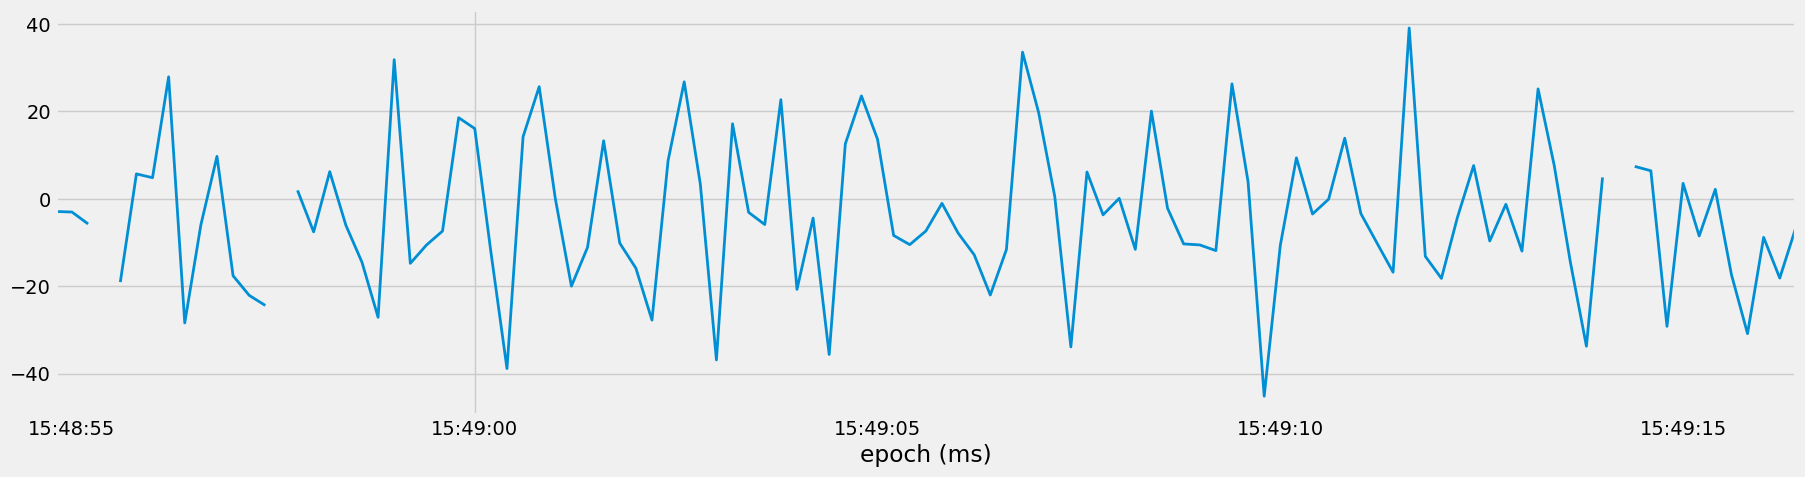

In [7]:
subset= df[df["set"]== 35]["gyr_y"].plot()

In [8]:
for col in predictor_columns:
    df[col] = df[col].interpolate()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x        9009 non-null   float64
 1   acc_y        9009 non-null   float64
 2   acc_z        9009 non-null   float64
 3   gyr_x        9009 non-null   float64
 4   gyr_y        9009 non-null   float64
 5   gyr_z        9009 non-null   float64
 6   participant  9009 non-null   object 
 7   label        9009 non-null   object 
 8   category     9009 non-null   object 
 9   set          9009 non-null   int32  
dtypes: float64(6), int32(1), object(3)
memory usage: 739.0+ KB


# Calculating set duration

<AxesSubplot:xlabel='epoch (ms)'>

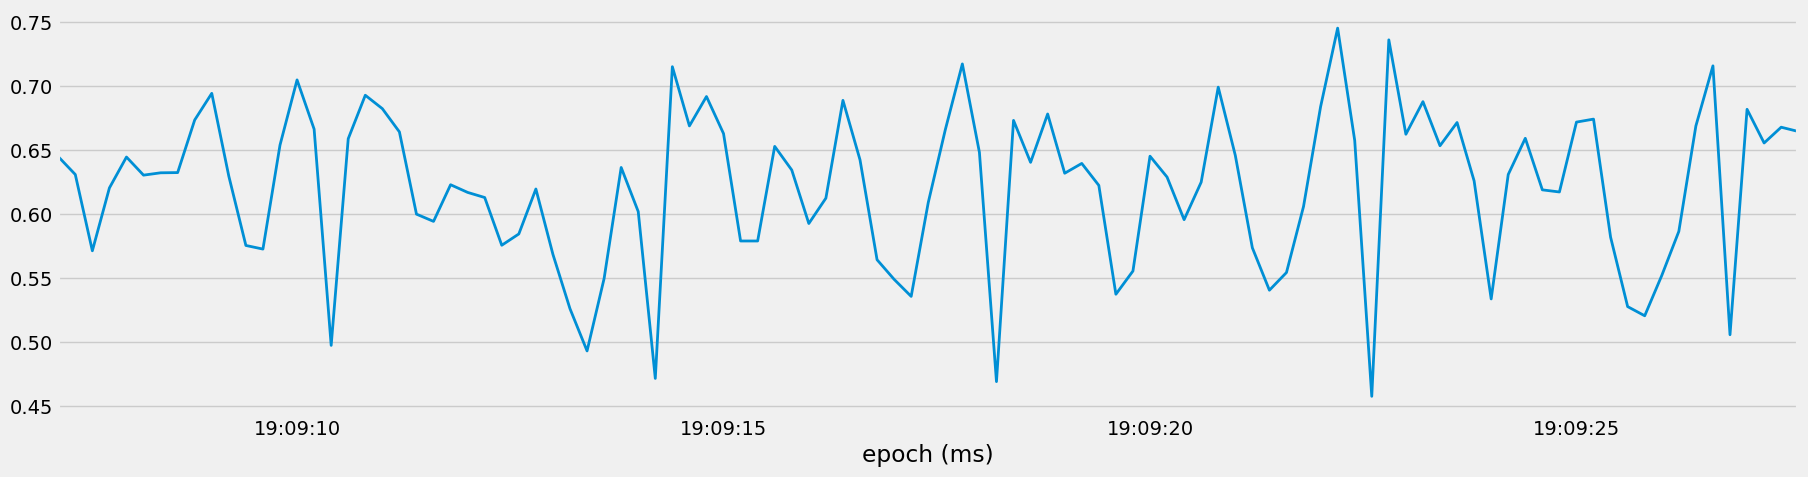

In [9]:
df[df["set"]==25]["acc_y"].plot()


<AxesSubplot:xlabel='epoch (ms)'>

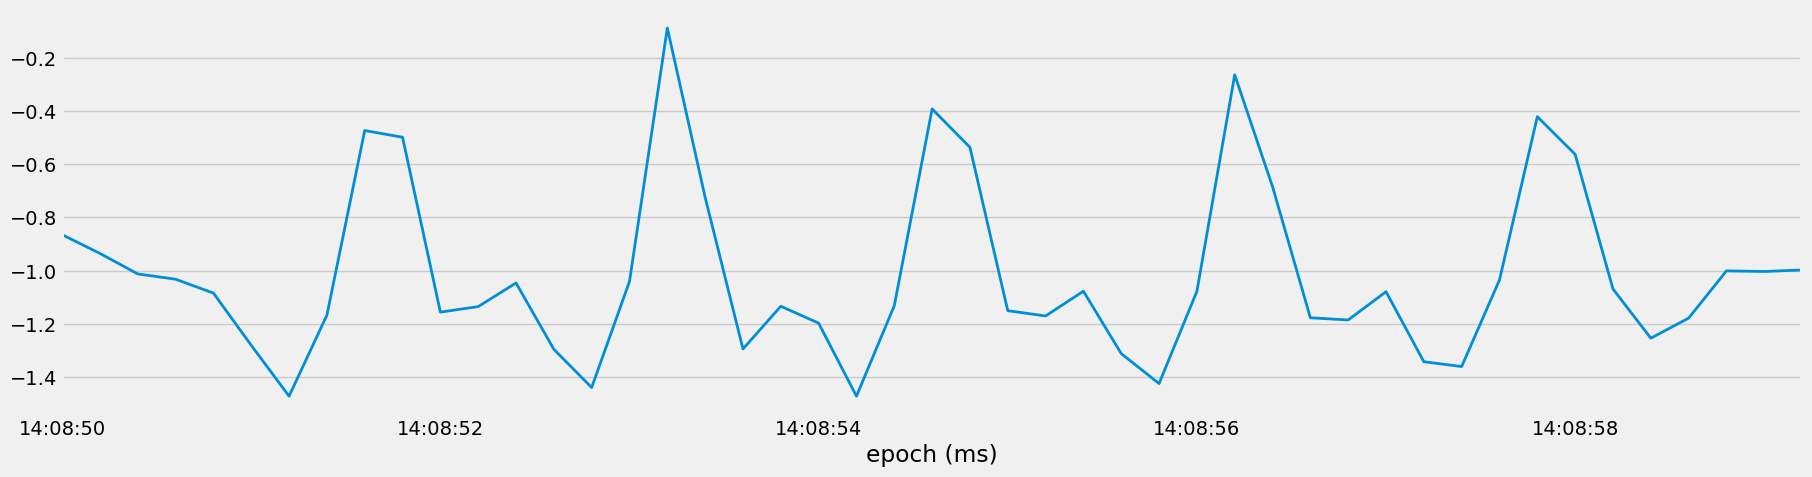

In [10]:
df[df["set"]==50]["acc_y"].plot()

In [11]:
duration = df[df["set"]==1].index[-1] - df[df["set"]==1].index[0]
duration.seconds

16

In [12]:
for s in df["set"].unique():
    start = df[df["set"]==s].index[0]
    stop = df[df["set"]==s].index[-1]
    duration =stop-start
    df.loc[(df["set"]==s), "duration"] = duration.seconds
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration
epoch (ms),,,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30,16.0
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30,16.0
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30,16.0
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30,16.0
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,90,19.0
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,90,19.0
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,90,19.0


In [13]:
duration_df = df.groupby(["category"])["duration"].mean()
duration_df

category
heavy       14.743501
medium      24.942529
sitting     33.000000
standing    39.000000
Name: duration, dtype: float64

In [14]:
#duration per repetition
duration_df.iloc[0]/5
duration_df.iloc[1]/10

2.4942528735632186

# Butterworth lowpass filter

dead


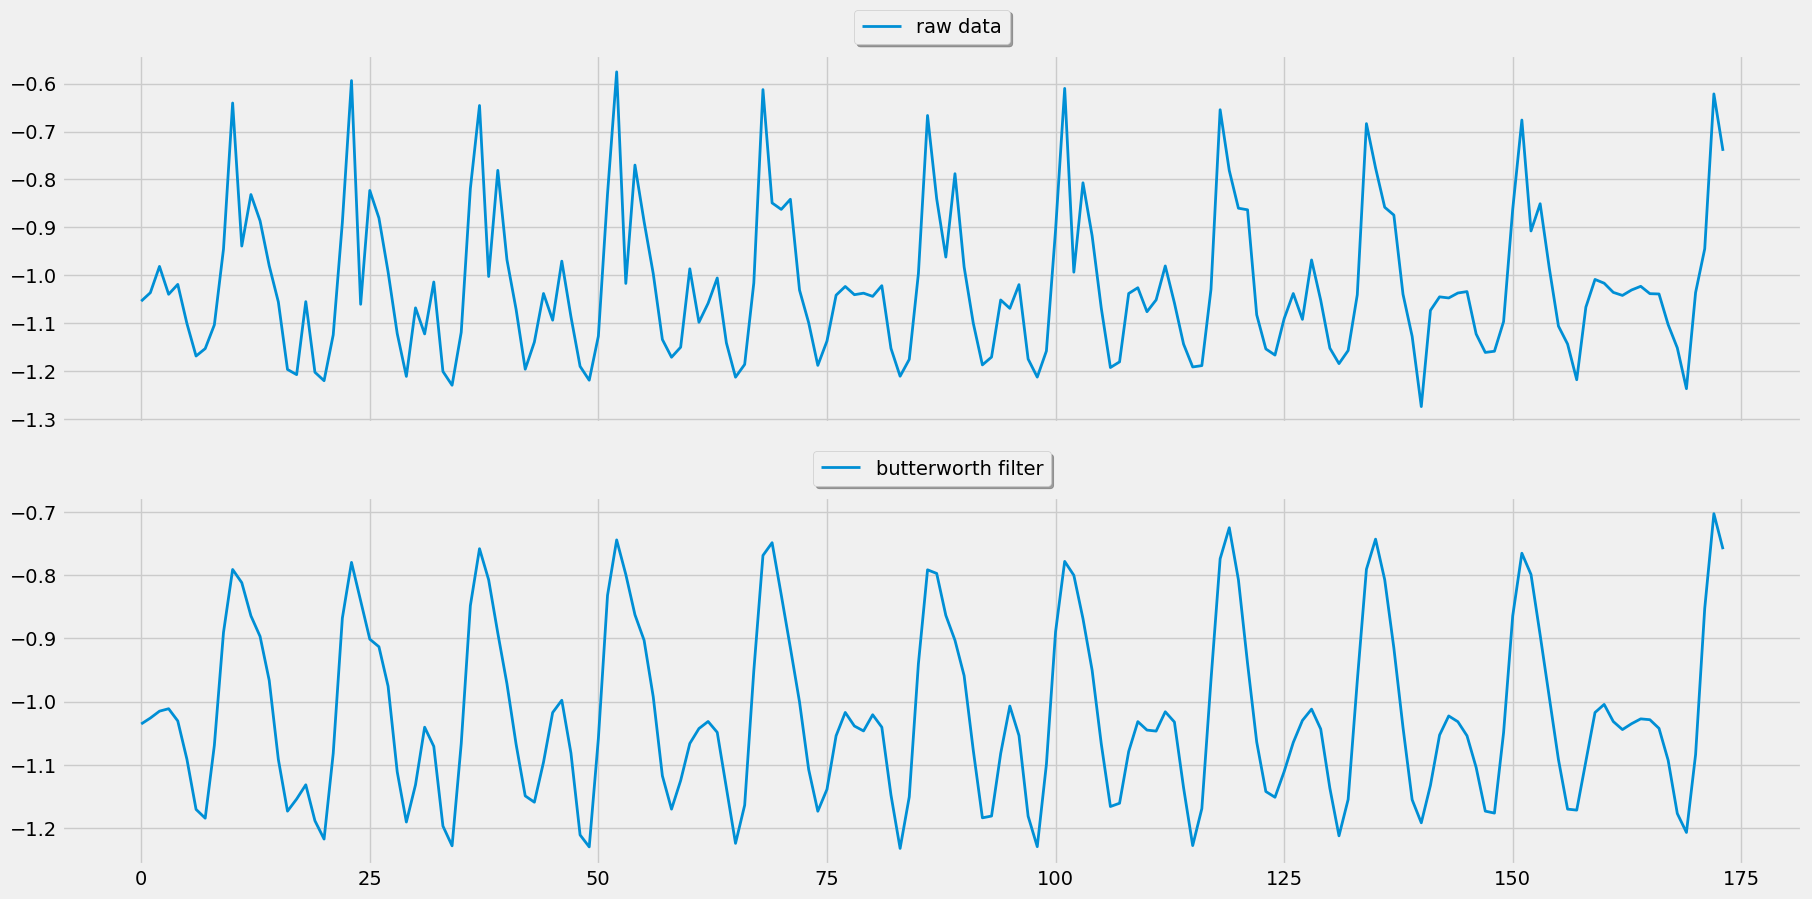

In [15]:
df_lowpass = df.copy()
LowPass = LowPassFilter()

fs = 1000/200
cutoff = 1.2 # this is the pertinent indice for less vibrations
df_lowpass = LowPass.low_pass_filter(df_lowpass, "acc_y", fs, cutoff, order = 5)

subset = df_lowpass[df_lowpass["set"]==75]
print(subset["label"][0])

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 10))
ax[0].plot(subset["acc_y"].reset_index(drop=True), label ="raw data")
ax[1].plot(subset["acc_y_lowpass"].reset_index(drop= True), label="butterworth filter")
ax[0].legend(loc = "upper center" ,bbox_to_anchor = (0.5, 1.15), fancybox = True, shadow=True) 
ax[1].legend(loc = "upper center", bbox_to_anchor = (0.5, 1.15), fancybox = True, shadow=True)

In [16]:
for col in predictor_columns:
    df_lowpass = LowPass.low_pass_filter(df_lowpass, col, fs, cutoff, order = 5)
    df_lowpass[col] = df_lowpass[col + "_lowpass"]
    del df_lowpass[col + "_lowpass"]
df_lowpass

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration
epoch (ms),,,,,,,,,,,
2019-01-11 15:08:05.200,0.013494,0.977001,-0.070995,-1.896395,2.439080,0.939616,B,bench,heavy,30,16.0
2019-01-11 15:08:05.400,0.006869,0.970257,-0.067545,2.129685,0.528678,-1.248135,B,bench,heavy,30,16.0
2019-01-11 15:08:05.600,-0.009603,0.963589,-0.073447,4.151973,-2.092258,-0.929804,B,bench,heavy,30,16.0
2019-01-11 15:08:05.800,-0.022998,0.965441,-0.083731,2.074477,-3.626288,0.880509,B,bench,heavy,30,16.0
2019-01-11 15:08:06.000,-0.020032,0.966784,-0.093783,1.041930,-1.219897,-2.260590,B,bench,heavy,30,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,E,row,medium,90,19.0
2019-01-20 17:33:27.200,-0.042806,-1.020916,-0.057715,-2.514546,-2.449224,1.255524,E,row,medium,90,19.0
2019-01-20 17:33:27.400,-0.047074,-1.051656,-0.066326,-0.673530,-1.799975,1.193779,E,row,medium,90,19.0


# Principal component analysis ACP

In [17]:
df_pca = df_lowpass.copy()
PCA = PrincipalComponentAnalysis()

In [18]:
#variance of each axe
pc_values = PCA.determine_pc_explained_variance(df_pca, predictor_columns)
pc_values

array([0.58094932, 0.27090665, 0.06427472, 0.05519685, 0.01836808,
       0.01030437])

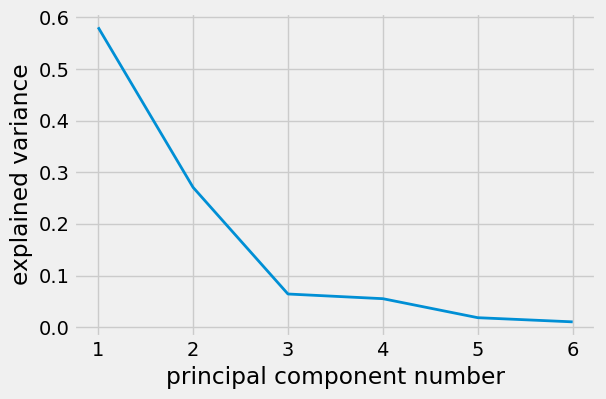

In [27]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(predictor_columns) + 1), pc_values)
plt.xlabel("principal component number")
plt.ylabel("explained variance")
plt.show()

In [ ]:
#reducing the number of components to 3
df_pca = PCA.apply_pca(df_pca, predictor_columns, 3)
df_pca

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,pca_1,pca_2,pca_3
epoch (ms),,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013494,0.977001,-0.070995,-1.896395,2.439080,0.939616,B,bench,heavy,30,16.0,-0.317491,-0.075816,0.070520
2019-01-11 15:08:05.400,0.006869,0.970257,-0.067545,2.129685,0.528678,-1.248135,B,bench,heavy,30,16.0,-0.315555,-0.075282,0.070565
2019-01-11 15:08:05.600,-0.009603,0.963589,-0.073447,4.151973,-2.092258,-0.929804,B,bench,heavy,30,16.0,-0.314780,-0.081915,0.065980
2019-01-11 15:08:05.800,-0.022998,0.965441,-0.083731,2.074477,-3.626288,0.880509,B,bench,heavy,30,16.0,-0.316880,-0.090205,0.060065
2019-01-11 15:08:06.000,-0.020032,0.966784,-0.093783,1.041930,-1.219897,-2.260590,B,bench,heavy,30,16.0,-0.317350,-0.095463,0.063173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,E,row,medium,90,19.0,0.346775,-0.147540,-0.051285
2019-01-20 17:33:27.200,-0.042806,-1.020916,-0.057715,-2.514546,-2.449224,1.255524,E,row,medium,90,19.0,0.362725,-0.146231,-0.059154
2019-01-20 17:33:27.400,-0.047074,-1.051656,-0.066326,-0.673530,-1.799975,1.193779,E,row,medium,90,19.0,0.372734,-0.153069,-0.058939


<AxesSubplot:xlabel='epoch (ms)'>

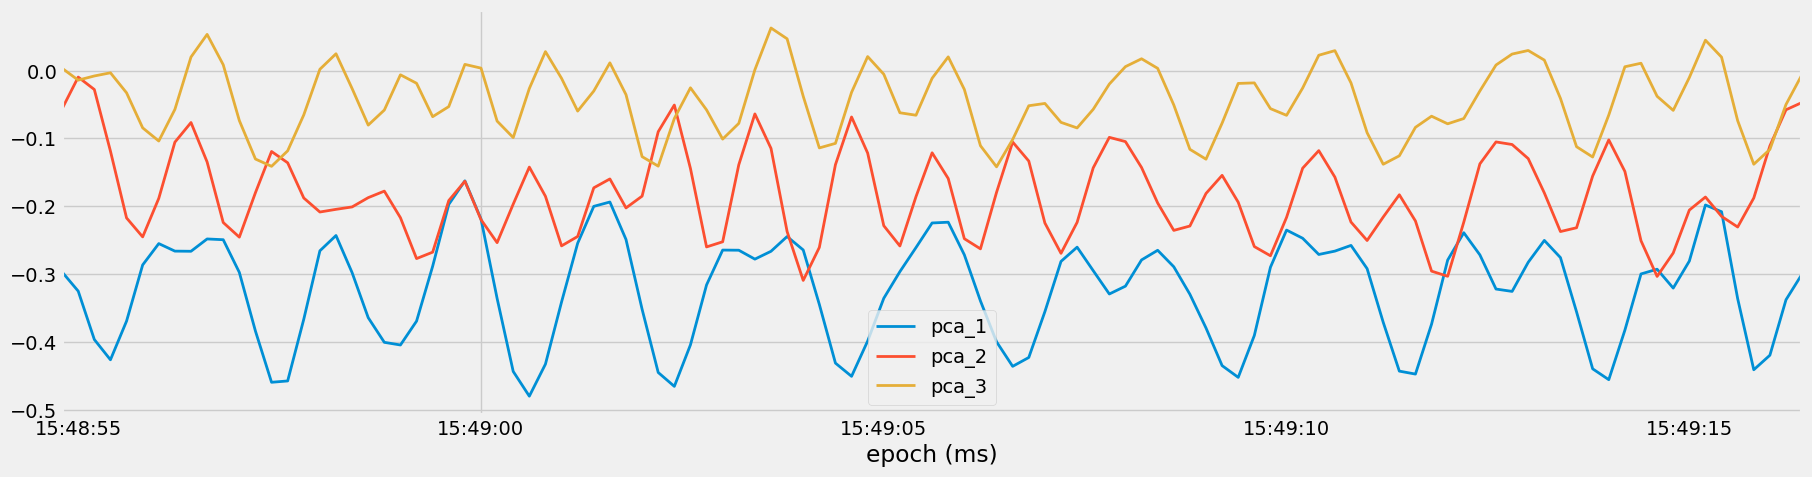

In [22]:
#plotting the three component
subset= df_pca[df_pca["set"]==35]
subset[["pca_1", "pca_2", "pca_3"]].plot() 

# Sum of squares attributes

array([<AxesSubplot:xlabel='epoch (ms)'>,
       <AxesSubplot:xlabel='epoch (ms)'>], dtype=object)

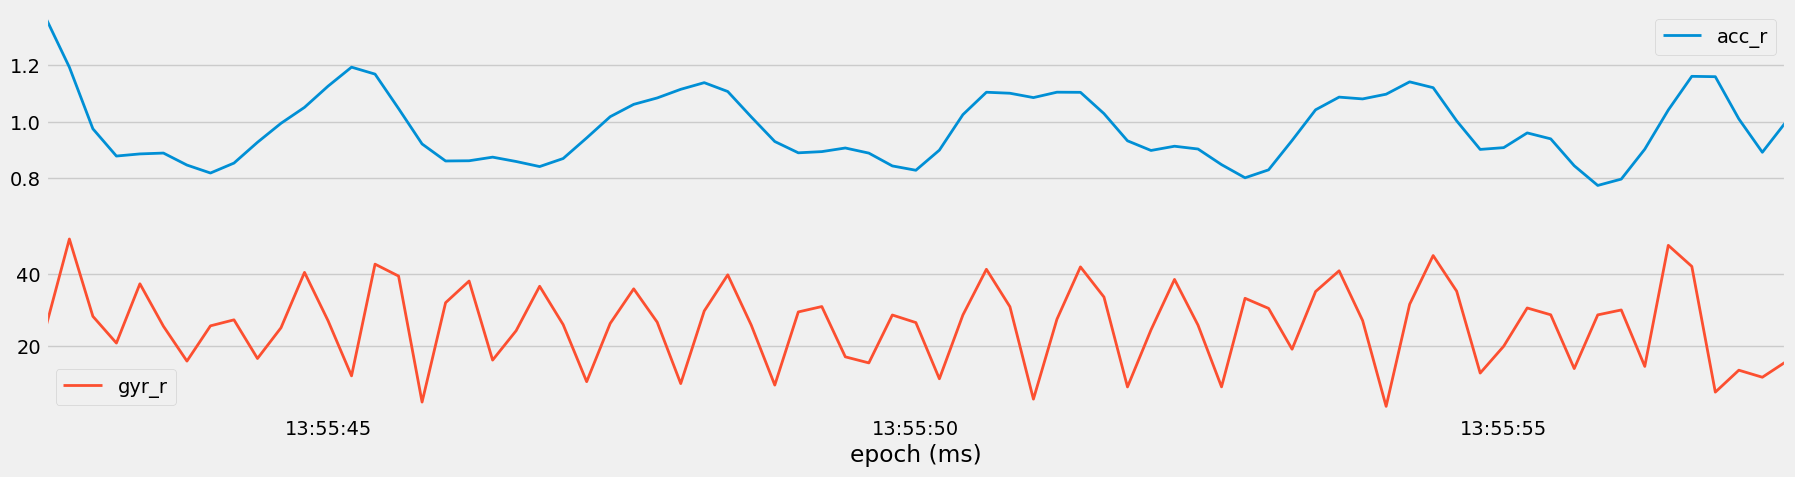

In [29]:
df_squared = df_pca.copy()
acc_r = df_squared["acc_x"]**2 + df_squared["acc_y"]**2 + df_squared["acc_z"]**2
gyr_r = df_squared["gyr_x"]**2 + df_squared["gyr_y"]**2 + df_squared["gyr_z"]**2

df_squared["acc_r"] = np.sqrt(acc_r)
df_squared["gyr_r"] = np.sqrt(gyr_r)

#df_squared
subset = df_squared[df_squared["set"]==14]
subset[["acc_r", "gyr_r"]].plot(subplots = True)

# Temporal abstraction

In [30]:
df_temporal = df_squared.copy()
NumAbs = NumericalAbstraction()
#predictor_columns = list(df.columns[:6])
predictor_columns = predictor_columns + ["acc_r", "gyr_r"]
ws = int(1000/200)
predictor_columns

['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'acc_r', 'gyr_r']

In [31]:
for col in predictor_columns:
    df_temporal = NumAbs.abstract_numerical(df_temporal, [col], ws, "mean")
    df_temporal = NumAbs.abstract_numerical(df_temporal, [col], ws, "std")
    

In [32]:

#same abstraction as above , here we just groupe by sets , every set has its own rolling mean and std
df_temporal_list = []
for s in df_temporal["set"].unique():
    subset = df_temporal[df_temporal["set"]==s].copy()
    for col in predictor_columns:
        subset = NumAbs.abstract_numerical(subset, [col], ws, "mean")
        subset = NumAbs.abstract_numerical(subset, [col], ws, "std")
    df_temporal_list.append(subset)
df_temporal = pd.concat(df_temporal_list)


In [33]:
pd.set_option('display.max_columns', None)
df_temporal

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,pca_1,pca_2,pca_3,acc_r,gyr_r,acc_x_temp_mean_ws_5,acc_x_temp_std_ws_5,acc_y_temp_mean_ws_5,acc_y_temp_std_ws_5,acc_z_temp_mean_ws_5,acc_z_temp_std_ws_5,gyr_x_temp_mean_ws_5,gyr_x_temp_std_ws_5,gyr_y_temp_mean_ws_5,gyr_y_temp_std_ws_5,gyr_z_temp_mean_ws_5,gyr_z_temp_std_ws_5,acc_r_temp_mean_ws_5,acc_r_temp_std_ws_5,gyr_r_temp_mean_ws_5,gyr_r_temp_std_ws_5
epoch (ms),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013494,0.977001,-0.070995,-1.896395,2.439080,0.939616,B,bench,heavy,30,16.0,-0.317491,-0.075816,0.070520,0.979670,3.229288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.400,0.006869,0.970257,-0.067545,2.129685,0.528678,-1.248135,B,bench,heavy,30,16.0,-0.315555,-0.075282,0.070565,0.972630,2.524460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.600,-0.009603,0.963589,-0.073447,4.151973,-2.092258,-0.929804,B,bench,heavy,30,16.0,-0.314780,-0.081915,0.065980,0.966432,4.741409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.800,-0.022998,0.965441,-0.083731,2.074477,-3.626288,0.880509,B,bench,heavy,30,16.0,-0.316880,-0.090205,0.060065,0.969338,4.269510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:06.000,-0.020032,0.966784,-0.093783,1.041930,-1.219897,-2.260590,B,bench,heavy,30,16.0,-0.317350,-0.095463,0.063173,0.971528,2.772009,-0.006454,0.014446,0.968615,0.004727,-0.077900,0.009602,1.500334,1.975086,-0.794137,2.101951,-0.523681,1.250569,0.971920,0.004416,3.507335,0.858825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.045056,-0.974791,-0.061752,3.273522,-4.487268,0.133850,E,row,medium,90,19.0,0.346775,-0.147540,-0.051285,0.977783,5.556027,-0.005624,0.041581,-1.074793,0.122411,-0.038886,0.079682,-11.816937,17.831662,0.603702,5.346850,7.165439,6.227556,1.079434,0.120865,19.162630,14.473459
2019-01-20 17:33:27.200,-0.042806,-1.020916,-0.057715,-2.514546,-2.449224,1.255524,E,row,medium,90,19.0,0.362725,-0.146231,-0.059154,1.023441,3.727999,-0.026533,0.025705,-1.094715,0.102257,-0.072917,0.026116,-4.923778,12.693305,-1.469373,3.932028,4.409868,5.078760,1.098084,0.102142,11.768908,10.474589
2019-01-20 17:33:27.400,-0.047074,-1.051656,-0.066326,-0.673530,-1.799975,1.193779,E,row,medium,90,19.0,0.372734,-0.153069,-0.058939,1.054796,2.262446,-0.040331,0.009233,-1.061228,0.081314,-0.078277,0.020952,0.697498,4.394449,-2.997093,1.570800,1.931172,2.207628,1.065057,0.082144,5.749964,2.605498


<AxesSubplot:xlabel='epoch (ms)'>

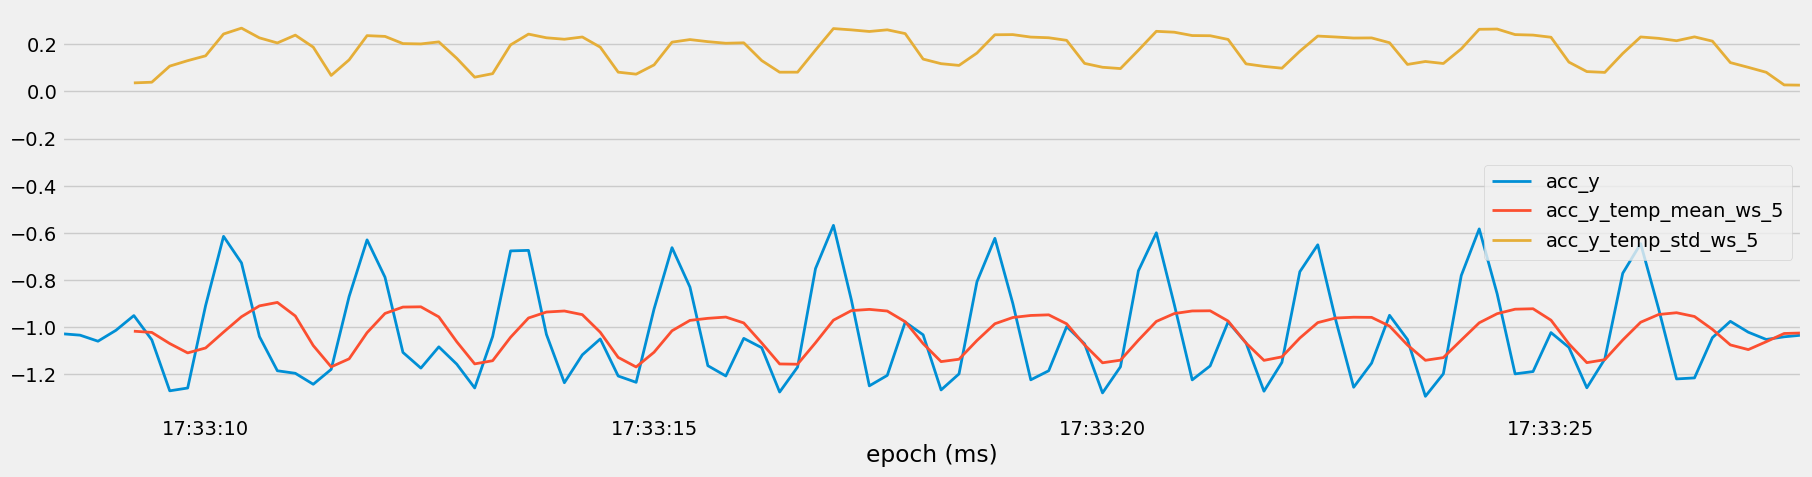

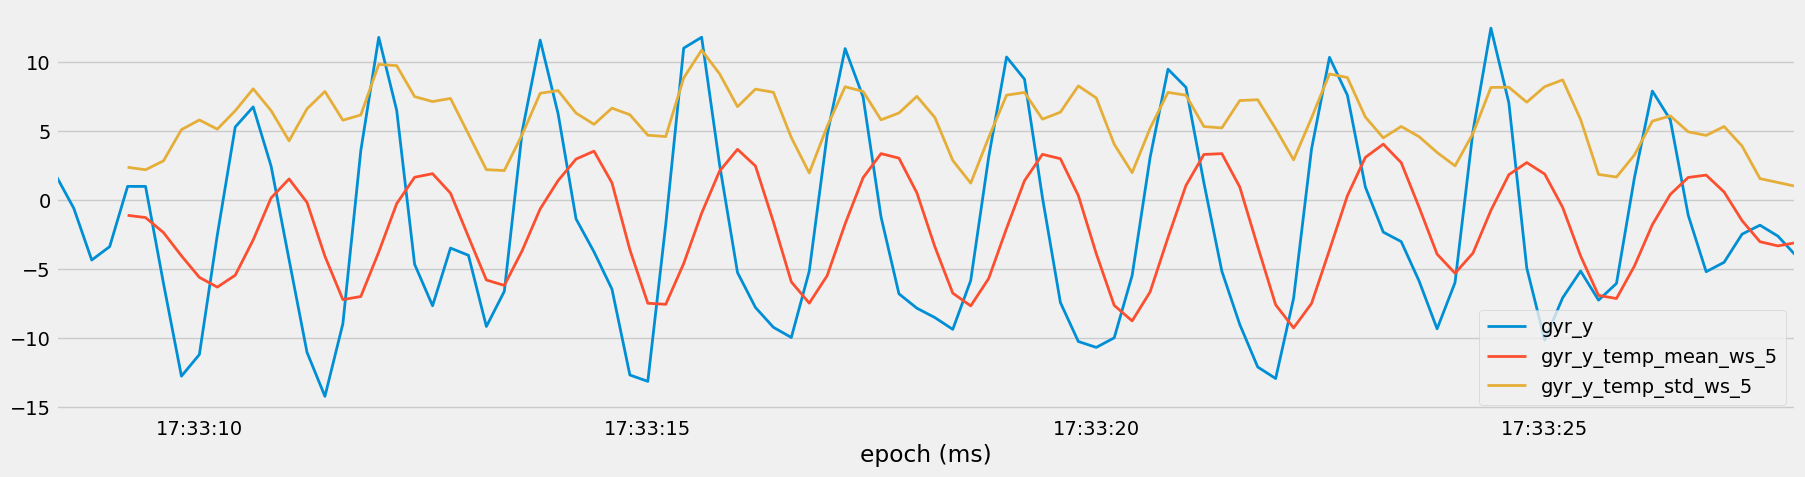

In [34]:
subset[["acc_y", "acc_y_temp_mean_ws_5", "acc_y_temp_std_ws_5"]].plot()
subset[["gyr_y", "gyr_y_temp_mean_ws_5", "gyr_y_temp_std_ws_5"]].plot()

# Discret Fourier Transforamtion

In [35]:
df_freq= df_temporal.copy().reset_index()
FreqAbs = FourierTransformation()
fs = int(1000/200)
ws = int(2800/200)


In [36]:
df_freq = FreqAbs.abstract_frequency(df_freq, ["acc_y"], ws, fs)
df_freq.columns

Index(['epoch (ms)', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z',
       'participant', 'label', 'category', 'set', 'duration', 'pca_1', 'pca_2',
       'pca_3', 'acc_r', 'gyr_r', 'acc_x_temp_mean_ws_5',
       'acc_x_temp_std_ws_5', 'acc_y_temp_mean_ws_5', 'acc_y_temp_std_ws_5',
       'acc_z_temp_mean_ws_5', 'acc_z_temp_std_ws_5', 'gyr_x_temp_mean_ws_5',
       'gyr_x_temp_std_ws_5', 'gyr_y_temp_mean_ws_5', 'gyr_y_temp_std_ws_5',
       'gyr_z_temp_mean_ws_5', 'gyr_z_temp_std_ws_5', 'acc_r_temp_mean_ws_5',
       'acc_r_temp_std_ws_5', 'gyr_r_temp_mean_ws_5', 'gyr_r_temp_std_ws_5',
       'acc_y_max_freq', 'acc_y_freq_weighted', 'acc_y_pse',
       'acc_y_freq_0.0_Hz_ws_14', 'acc_y_freq_0.357_Hz_ws_14',
       'acc_y_freq_0.714_Hz_ws_14', 'acc_y_freq_1.071_Hz_ws_14',
       'acc_y_freq_1.429_Hz_ws_14', 'acc_y_freq_1.786_Hz_ws_14',
       'acc_y_freq_2.143_Hz_ws_14', 'acc_y_freq_2.5_Hz_ws_14'],
      dtype='object')

# Visualize results

<AxesSubplot:>

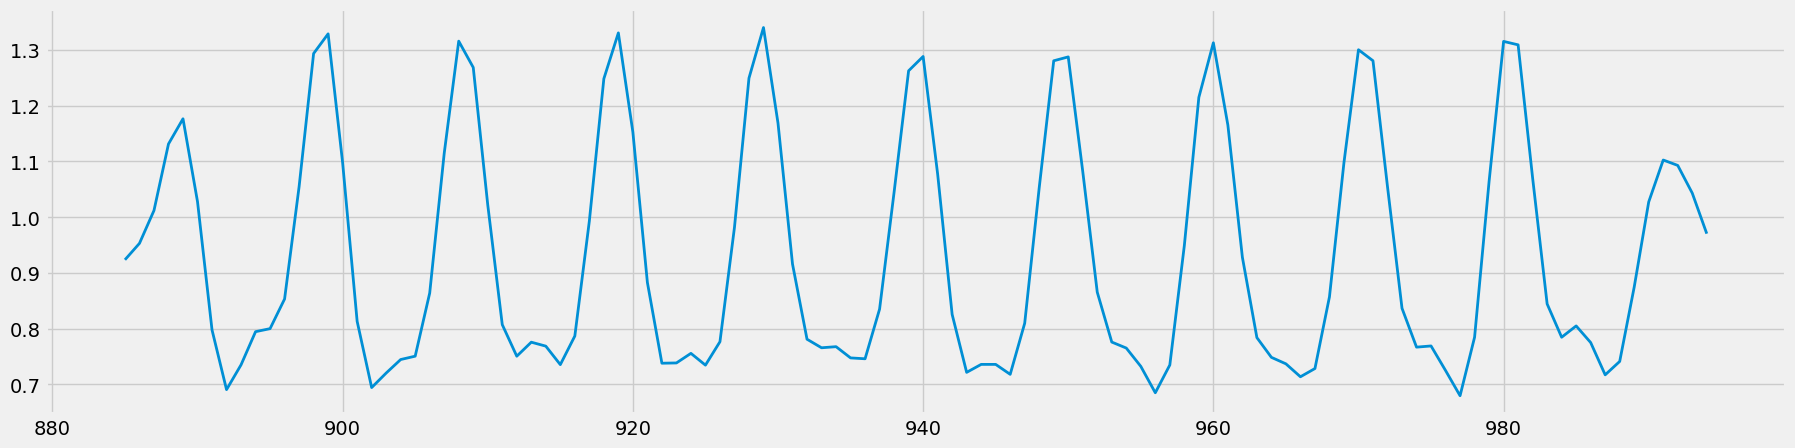

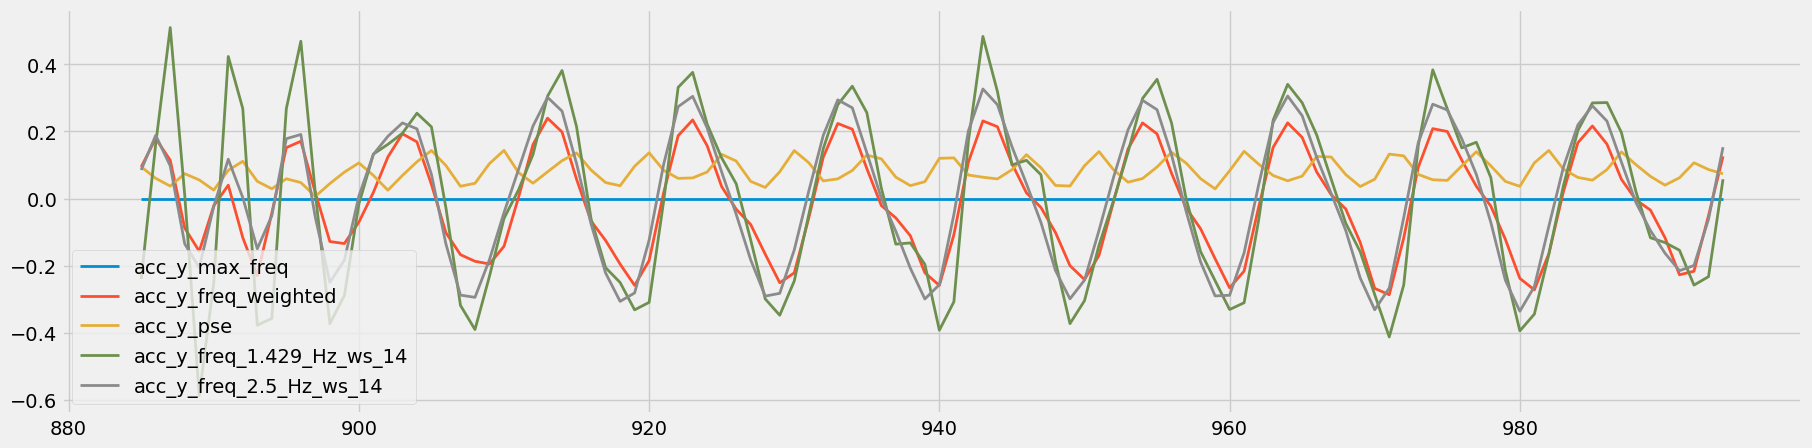

In [38]:
subset = df_freq[df_freq["set"]==15]
subset["acc_y"].plot()
subset[
    ['acc_y_max_freq', 'acc_y_freq_weighted', 'acc_y_pse', 'acc_y_freq_1.429_Hz_ws_14', 'acc_y_freq_2.5_Hz_ws_14']
].plot()

In [32]:
#apply fourier to tansformation to the predictor columns
df_freq_list = []
for s in df_freq["set"].unique():
    print(f"Apply Fourier Transformation to set{s}")
    subset = df_freq[df_freq["set"]==s].reset_index(drop=True).copy()
    subset = FreqAbs.abstract_frequency(subset, predictor_columns, ws, fs)
   
    df_freq_list.append(subset)
df_freq = pd.concat(df_freq_list).set_index("epoch (ms)", drop = True)
df_freq

Apply Fourier Transformation to set30
Apply Fourier Transformation to set1
Apply Fourier Transformation to set31
Apply Fourier Transformation to set3
Apply Fourier Transformation to set9
Apply Fourier Transformation to set32
Apply Fourier Transformation to set10
Apply Fourier Transformation to set33
Apply Fourier Transformation to set11
Apply Fourier Transformation to set34
Apply Fourier Transformation to set35
Apply Fourier Transformation to set15
Apply Fourier Transformation to set36
Apply Fourier Transformation to set16
Apply Fourier Transformation to set37
Apply Fourier Transformation to set17
Apply Fourier Transformation to set27
Apply Fourier Transformation to set38
Apply Fourier Transformation to set28
Apply Fourier Transformation to set29
Apply Fourier Transformation to set6
Apply Fourier Transformation to set65
Apply Fourier Transformation to set67
Apply Fourier Transformation to set73
Apply Fourier Transformation to set4
Apply Fourier Transformation to set2
Apply Fourier Tran

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,pca_1,pca_2,pca_3,acc_r,gyr_r,acc_x_temp_mean_ws_5,acc_x_temp_std_ws_5,acc_y_temp_mean_ws_5,acc_y_temp_std_ws_5,acc_z_temp_mean_ws_5,acc_z_temp_std_ws_5,gyr_x_temp_mean_ws_5,gyr_x_temp_std_ws_5,gyr_y_temp_mean_ws_5,gyr_y_temp_std_ws_5,gyr_z_temp_mean_ws_5,gyr_z_temp_std_ws_5,acc_r_temp_mean_ws_5,acc_r_temp_std_ws_5,gyr_r_temp_mean_ws_5,gyr_r_temp_std_ws_5,acc_y_max_freq,acc_y_freq_weighted,acc_y_pse,acc_y_freq_0.0_Hz_ws_14,acc_y_freq_0.357_Hz_ws_14,acc_y_freq_0.714_Hz_ws_14,acc_y_freq_1.071_Hz_ws_14,acc_y_freq_1.429_Hz_ws_14,acc_y_freq_1.786_Hz_ws_14,acc_y_freq_2.143_Hz_ws_14,acc_y_freq_2.5_Hz_ws_14,acc_x_max_freq,acc_x_freq_weighted,acc_x_pse,acc_x_freq_0.0_Hz_ws_14,acc_x_freq_0.357_Hz_ws_14,acc_x_freq_0.714_Hz_ws_14,acc_x_freq_1.071_Hz_ws_14,acc_x_freq_1.429_Hz_ws_14,acc_x_freq_1.786_Hz_ws_14,acc_x_freq_2.143_Hz_ws_14,acc_x_freq_2.5_Hz_ws_14,acc_z_max_freq,acc_z_freq_weighted,acc_z_pse,acc_z_freq_0.0_Hz_ws_14,acc_z_freq_0.357_Hz_ws_14,acc_z_freq_0.714_Hz_ws_14,acc_z_freq_1.071_Hz_ws_14,acc_z_freq_1.429_Hz_ws_14,acc_z_freq_1.786_Hz_ws_14,acc_z_freq_2.143_Hz_ws_14,acc_z_freq_2.5_Hz_ws_14,gyr_x_max_freq,gyr_x_freq_weighted,gyr_x_pse,gyr_x_freq_0.0_Hz_ws_14,gyr_x_freq_0.357_Hz_ws_14,gyr_x_freq_0.714_Hz_ws_14,gyr_x_freq_1.071_Hz_ws_14,gyr_x_freq_1.429_Hz_ws_14,gyr_x_freq_1.786_Hz_ws_14,gyr_x_freq_2.143_Hz_ws_14,gyr_x_freq_2.5_Hz_ws_14,gyr_y_max_freq,gyr_y_freq_weighted,gyr_y_pse,gyr_y_freq_0.0_Hz_ws_14,gyr_y_freq_0.357_Hz_ws_14,gyr_y_freq_0.714_Hz_ws_14,gyr_y_freq_1.071_Hz_ws_14,gyr_y_freq_1.429_Hz_ws_14,gyr_y_freq_1.786_Hz_ws_14,gyr_y_freq_2.143_Hz_ws_14,gyr_y_freq_2.5_Hz_ws_14,gyr_z_max_freq,gyr_z_freq_weighted,gyr_z_pse,gyr_z_freq_0.0_Hz_ws_14,gyr_z_freq_0.357_Hz_ws_14,gyr_z_freq_0.714_Hz_ws_14,gyr_z_freq_1.071_Hz_ws_14,gyr_z_freq_1.429_Hz_ws_14,gyr_z_freq_1.786_Hz_ws_14,gyr_z_freq_2.143_Hz_ws_14,gyr_z_freq_2.5_Hz_ws_14,acc_r_max_freq,acc_r_freq_weighted,acc_r_pse,acc_r_freq_0.0_Hz_ws_14,acc_r_freq_0.357_Hz_ws_14,acc_r_freq_0.714_Hz_ws_14,acc_r_freq_1.071_Hz_ws_14,acc_r_freq_1.429_Hz_ws_14,acc_r_freq_1.786_Hz_ws_14,acc_r_freq_2.143_Hz_ws_14,acc_r_freq_2.5_Hz_ws_14,gyr_r_max_freq,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013494,0.977001,-0.070995,-1.896395,2.439080,0.939616,B,bench,heavy,30,16.0,-0.317491,-0.075816,0.070520,0.979670,3.229288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.400,0.006869,0.970257,-0.067545,2.129685,0.528678,-1.248135,B,bench,heavy,30,16.0,-0.315555,-0.075282,0.070565,0.972630,2.524460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.600,-0.009603,0.963589,-0.073447,4.151973,-2.092258,-0.929804,B,bench,heavy,30,16.0,-0.314780,-0.081915,0.065980,0.966432,4.741409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# Dealing with overlapping windows

In [33]:
df_freq = df_freq.dropna()
df_freq = df_freq.iloc[::2]
df_freq

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,pca_1,pca_2,pca_3,acc_r,gyr_r,acc_x_temp_mean_ws_5,acc_x_temp_std_ws_5,acc_y_temp_mean_ws_5,acc_y_temp_std_ws_5,acc_z_temp_mean_ws_5,acc_z_temp_std_ws_5,gyr_x_temp_mean_ws_5,gyr_x_temp_std_ws_5,gyr_y_temp_mean_ws_5,gyr_y_temp_std_ws_5,gyr_z_temp_mean_ws_5,gyr_z_temp_std_ws_5,acc_r_temp_mean_ws_5,acc_r_temp_std_ws_5,gyr_r_temp_mean_ws_5,gyr_r_temp_std_ws_5,acc_y_max_freq,acc_y_freq_weighted,acc_y_pse,acc_y_freq_0.0_Hz_ws_14,acc_y_freq_0.357_Hz_ws_14,acc_y_freq_0.714_Hz_ws_14,acc_y_freq_1.071_Hz_ws_14,acc_y_freq_1.429_Hz_ws_14,acc_y_freq_1.786_Hz_ws_14,acc_y_freq_2.143_Hz_ws_14,acc_y_freq_2.5_Hz_ws_14,acc_x_max_freq,acc_x_freq_weighted,acc_x_pse,acc_x_freq_0.0_Hz_ws_14,acc_x_freq_0.357_Hz_ws_14,acc_x_freq_0.714_Hz_ws_14,acc_x_freq_1.071_Hz_ws_14,acc_x_freq_1.429_Hz_ws_14,acc_x_freq_1.786_Hz_ws_14,acc_x_freq_2.143_Hz_ws_14,acc_x_freq_2.5_Hz_ws_14,acc_z_max_freq,acc_z_freq_weighted,acc_z_pse,acc_z_freq_0.0_Hz_ws_14,acc_z_freq_0.357_Hz_ws_14,acc_z_freq_0.714_Hz_ws_14,acc_z_freq_1.071_Hz_ws_14,acc_z_freq_1.429_Hz_ws_14,acc_z_freq_1.786_Hz_ws_14,acc_z_freq_2.143_Hz_ws_14,acc_z_freq_2.5_Hz_ws_14,gyr_x_max_freq,gyr_x_freq_weighted,gyr_x_pse,gyr_x_freq_0.0_Hz_ws_14,gyr_x_freq_0.357_Hz_ws_14,gyr_x_freq_0.714_Hz_ws_14,gyr_x_freq_1.071_Hz_ws_14,gyr_x_freq_1.429_Hz_ws_14,gyr_x_freq_1.786_Hz_ws_14,gyr_x_freq_2.143_Hz_ws_14,gyr_x_freq_2.5_Hz_ws_14,gyr_y_max_freq,gyr_y_freq_weighted,gyr_y_pse,gyr_y_freq_0.0_Hz_ws_14,gyr_y_freq_0.357_Hz_ws_14,gyr_y_freq_0.714_Hz_ws_14,gyr_y_freq_1.071_Hz_ws_14,gyr_y_freq_1.429_Hz_ws_14,gyr_y_freq_1.786_Hz_ws_14,gyr_y_freq_2.143_Hz_ws_14,gyr_y_freq_2.5_Hz_ws_14,gyr_z_max_freq,gyr_z_freq_weighted,gyr_z_pse,gyr_z_freq_0.0_Hz_ws_14,gyr_z_freq_0.357_Hz_ws_14,gyr_z_freq_0.714_Hz_ws_14,gyr_z_freq_1.071_Hz_ws_14,gyr_z_freq_1.429_Hz_ws_14,gyr_z_freq_1.786_Hz_ws_14,gyr_z_freq_2.143_Hz_ws_14,gyr_z_freq_2.5_Hz_ws_14,acc_r_max_freq,acc_r_freq_weighted,acc_r_pse,acc_r_freq_0.0_Hz_ws_14,acc_r_freq_0.357_Hz_ws_14,acc_r_freq_0.714_Hz_ws_14,acc_r_freq_1.071_Hz_ws_14,acc_r_freq_1.429_Hz_ws_14,acc_r_freq_1.786_Hz_ws_14,acc_r_freq_2.143_Hz_ws_14,acc_r_freq_2.5_Hz_ws_14,gyr_r_max_freq,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.170494,0.888970,-0.172353,-25.990313,-10.162423,25.426906,B,bench,heavy,30,16.0,-0.306308,-0.170012,-0.020847,0.921435,37.753129,-0.195484,0.021401,1.007319,0.108611,-0.162543,0.046908,0.563800,17.473530,-2.087273,5.435146,4.332206,13.737157,1.041192,0.098486,20.719519,10.849825,0.000,0.026747,0.013829,14.485886,-0.004409,-0.425775,0.406523,-0.034129,0.041284,0.049688,0.051385,0.357,-1.380560,0.350715,-1.694784,0.356653,-0.009984,0.289288,0.093156,0.078544,0.071737,0.069201,1.071,-0.337879,0.203105,-2.076063,0.238778,-0.149461,0.295968,0.029667,0.032513,0.029683,0.028421,1.429,-20.272419,1.487749,21.867637,-28.683405,-56.366264,-10.929385,30.643781,15.082959,12.877286,12.218247,1.429,5.322040,1.962555,-12.568730,-8.852401,-8.307780,6.675210,12.478836,8.137713,7.358717,7.087166,0.357,24.279867,1.260056,-20.866334,61.839308,24.352906,-8.038443,-22.692324,-13.893337,-12.303092,-11.784731,0.0,0.015627,0.009954,14.824792,-0.066654,-0.381038,0.310732,-0.044051,0.023036,0.048288,0.044820,0.0,-1.135436,0.401838,227.845540,-29.795388,18.195603,0.294594,-24.424951,11.515400,-51.920406,-13.567962
2019-01-11 15:08:08.400,-0.027634,0.878027,-0.056321,-4.311919,-1.963210,3.088785,B,bench,heavy,30,16.0,-0.286807,-0.077810,0.041118,0.880266,5.655743,-0.143737,0.077727,0.903005,0.037147,-0.149692,0.062424,-8.069923,15.144955,-4.076105,4.852244,10.861898,11.137257,0.931150,0.052581,21.476519,10.743866,0.000,0.

# Clustering

In [34]:
df_cluster = df_freq.copy()
cluster_columns = ["acc_x", "acc_y", "acc_z"]
k_values = range(2, 10)
inertias = []
for k in k_values:
    subset = df_cluster[cluster_columns]
    kmeans = KMeans(n_clusters = k, n_init = 20, random_state = 0)
    cluster_labels = kmeans.fit_predict(subset)
    inertias.append(kmeans.inertia_)
#inertias


# Let's choose which k is better!


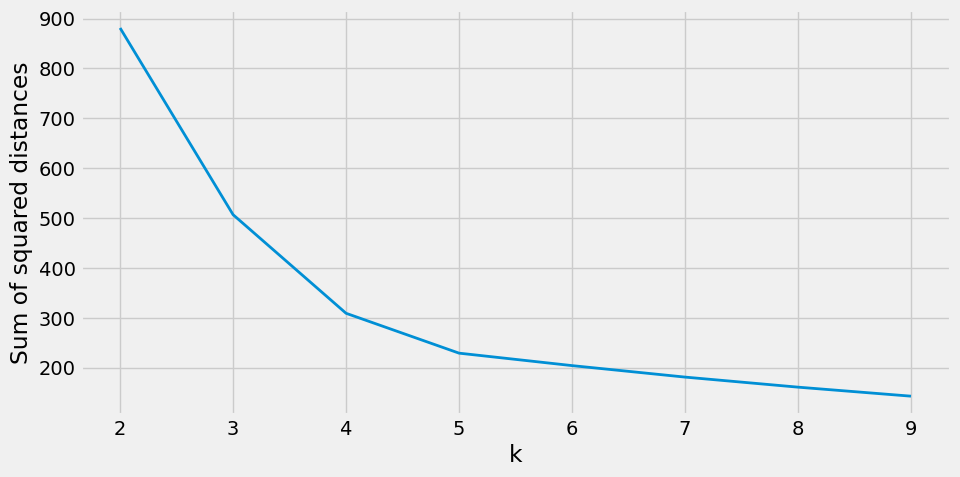

In [40]:
plt.figure(figsize=(10,5))
plt.plot(k_values, inertias)
plt.xlabel("k")
plt.ylabel("Sum of squared distances")
plt.show()

sooo the k=5

In [41]:
subset = df_cluster[cluster_columns]
kmeans = KMeans(n_clusters = 5, n_init = 20, random_state = 0)
df_cluster["cluster"] = kmeans.fit_predict(subset)

In [42]:
df_cluster

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,pca_1,pca_2,pca_3,acc_r,gyr_r,acc_x_temp_mean_ws_5,acc_x_temp_std_ws_5,acc_y_temp_mean_ws_5,acc_y_temp_std_ws_5,acc_z_temp_mean_ws_5,acc_z_temp_std_ws_5,gyr_x_temp_mean_ws_5,gyr_x_temp_std_ws_5,gyr_y_temp_mean_ws_5,gyr_y_temp_std_ws_5,gyr_z_temp_mean_ws_5,gyr_z_temp_std_ws_5,acc_r_temp_mean_ws_5,acc_r_temp_std_ws_5,gyr_r_temp_mean_ws_5,gyr_r_temp_std_ws_5,acc_y_max_freq,acc_y_freq_weighted,acc_y_pse,acc_y_freq_0.0_Hz_ws_14,acc_y_freq_0.357_Hz_ws_14,acc_y_freq_0.714_Hz_ws_14,acc_y_freq_1.071_Hz_ws_14,acc_y_freq_1.429_Hz_ws_14,acc_y_freq_1.786_Hz_ws_14,acc_y_freq_2.143_Hz_ws_14,acc_y_freq_2.5_Hz_ws_14,acc_x_max_freq,acc_x_freq_weighted,acc_x_pse,acc_x_freq_0.0_Hz_ws_14,acc_x_freq_0.357_Hz_ws_14,acc_x_freq_0.714_Hz_ws_14,acc_x_freq_1.071_Hz_ws_14,acc_x_freq_1.429_Hz_ws_14,acc_x_freq_1.786_Hz_ws_14,acc_x_freq_2.143_Hz_ws_14,acc_x_freq_2.5_Hz_ws_14,acc_z_max_freq,acc_z_freq_weighted,acc_z_pse,acc_z_freq_0.0_Hz_ws_14,acc_z_freq_0.357_Hz_ws_14,acc_z_freq_0.714_Hz_ws_14,acc_z_freq_1.071_Hz_ws_14,acc_z_freq_1.429_Hz_ws_14,acc_z_freq_1.786_Hz_ws_14,acc_z_freq_2.143_Hz_ws_14,acc_z_freq_2.5_Hz_ws_14,gyr_x_max_freq,gyr_x_freq_weighted,gyr_x_pse,gyr_x_freq_0.0_Hz_ws_14,gyr_x_freq_0.357_Hz_ws_14,gyr_x_freq_0.714_Hz_ws_14,gyr_x_freq_1.071_Hz_ws_14,gyr_x_freq_1.429_Hz_ws_14,gyr_x_freq_1.786_Hz_ws_14,gyr_x_freq_2.143_Hz_ws_14,gyr_x_freq_2.5_Hz_ws_14,gyr_y_max_freq,gyr_y_freq_weighted,gyr_y_pse,gyr_y_freq_0.0_Hz_ws_14,gyr_y_freq_0.357_Hz_ws_14,gyr_y_freq_0.714_Hz_ws_14,gyr_y_freq_1.071_Hz_ws_14,gyr_y_freq_1.429_Hz_ws_14,gyr_y_freq_1.786_Hz_ws_14,gyr_y_freq_2.143_Hz_ws_14,gyr_y_freq_2.5_Hz_ws_14,gyr_z_max_freq,gyr_z_freq_weighted,gyr_z_pse,gyr_z_freq_0.0_Hz_ws_14,gyr_z_freq_0.357_Hz_ws_14,gyr_z_freq_0.714_Hz_ws_14,gyr_z_freq_1.071_Hz_ws_14,gyr_z_freq_1.429_Hz_ws_14,gyr_z_freq_1.786_Hz_ws_14,gyr_z_freq_2.143_Hz_ws_14,gyr_z_freq_2.5_Hz_ws_14,acc_r_max_freq,acc_r_freq_weighted,acc_r_pse,acc_r_freq_0.0_Hz_ws_14,acc_r_freq_0.357_Hz_ws_14,acc_r_freq_0.714_Hz_ws_14,acc_r_freq_1.071_Hz_ws_14,acc_r_freq_1.429_Hz_ws_14,acc_r_freq_1.786_Hz_ws_14,acc_r_freq_2.143_Hz_ws_14,acc_r_freq_2.5_Hz_ws_14,gyr_r_max_freq,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.170494,0.888970,-0.172353,-25.990313,-10.162423,25.426906,B,bench,heavy,30,16.0,-0.306308,-0.170012,-0.020847,0.921435,37.753129,-0.195484,0.021401,1.007319,0.108611,-0.162543,0.046908,0.563800,17.473530,-2.087273,5.435146,4.332206,13.737157,1.041192,0.098486,20.719519,10.849825,0.000,0.026747,0.013829,14.485886,-0.004409,-0.425775,0.406523,-0.034129,0.041284,0.049688,0.051385,0.357,-1.380560,0.350715,-1.694784,0.356653,-0.009984,0.289288,0.093156,0.078544,0.071737,0.069201,1.071,-0.337879,0.203105,-2.076063,0.238778,-0.149461,0.295968,0.029667,0.032513,0.029683,0.028421,1.429,-20.272419,1.487749,21.867637,-28.683405,-56.366264,-10.929385,30.643781,15.082959,12.877286,12.218247,1.429,5.322040,1.962555,-12.568730,-8.852401,-8.307780,6.675210,12.478836,8.137713,7.358717,7.087166,0.357,24.279867,1.260056,-20.866334,61.839308,24.352906,-8.038443,-22.692324,-13.893337,-12.303092,-11.784731,0.0,0.015627,0.009954,14.824792,-0.066654,-0.381038,0.310732,-0.044051,0.023036,0.048288,0.044820,0.0,-1.135436,0.401838,227.845540,-29.795388,18.195603,0.294594,-24.424951,11.515400,-51.920406,-13.567962,0
2019-01-11 15:08:08.400,-0.027634,0.878027,-0.056321,-4.311919,-1.963210,3.088785,B,bench,heavy,30,16.0,-0.286807,-0.077810,0.041118,0.880266,5.655743,-0.143737,0.077727,0.903005,0.037147,-0.149692,0.062424,-8.069923,15.144955,-4.076105,4.852244,10.861898,11.137257,0.931150,0.052581,21.476519,10.7438

# Plot clusters of Accelerometer data

<function matplotlib.pyplot.show(close=None, block=None)>

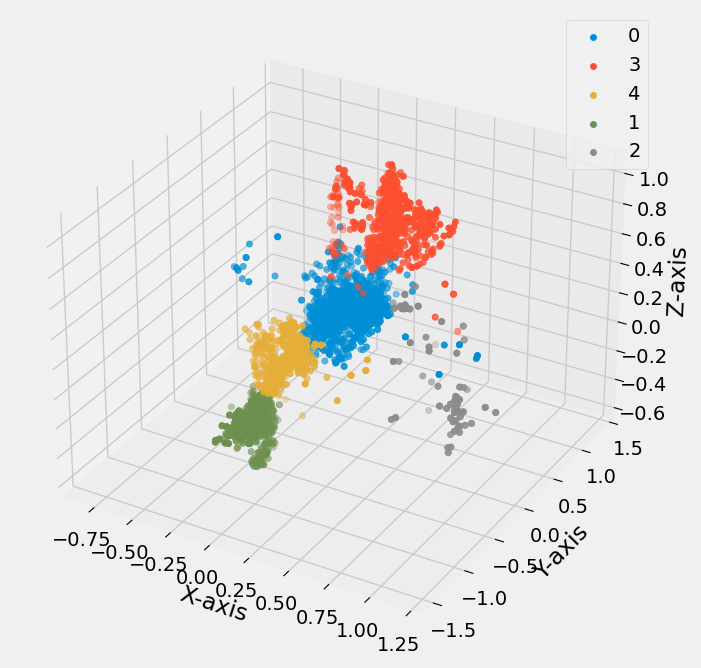

In [46]:
fig = plt.figure(figsize=(8, 8)) 
ax = fig.add_subplot(projection = "3d")
for c in df_cluster["cluster"].unique():
    subset = df_cluster[df_cluster["cluster"]==c]
    ax.scatter(subset["acc_x"], subset["acc_y"], subset["acc_z"], label = c)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis") 
plt.legend()
plt.show


# plot Accelerometer data grouped by label to compare!

<function matplotlib.pyplot.show(close=None, block=None)>

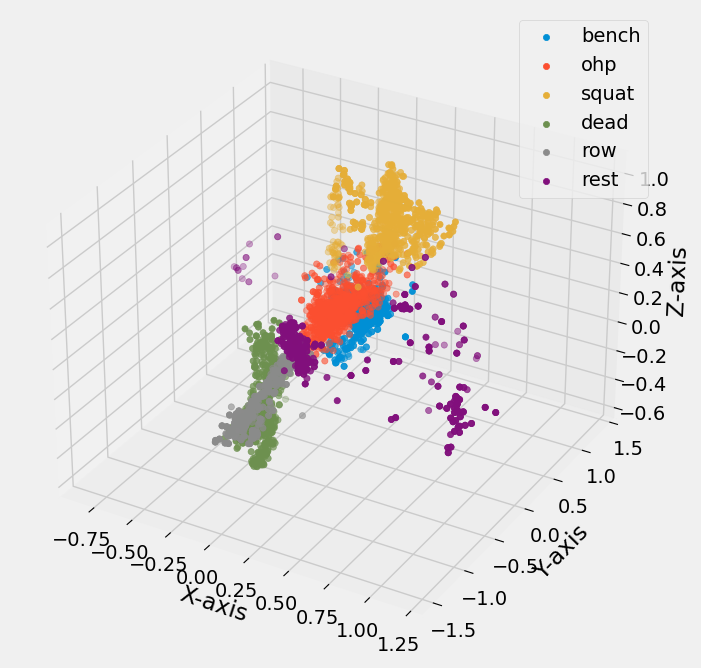

In [47]:
fig = plt.figure(figsize=(8, 8)) 
ax = fig.add_subplot(projection = "3d")
for c in df_cluster["label"].unique():
    subset = df_cluster[df_cluster["label"]==c]
    ax.scatter(subset["acc_x"], subset["acc_y"], subset["acc_z"], label = c)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis") 
plt.legend()
plt.show

# Export dataset

In [48]:
df_cluster.to_pickle("../../data/interim/03_data_features.pkl")